In [1]:
import os
import pandas as pd
import numpy as np
from multiprocessing import Pool
import multiprocessing
from data_loader import data_loader
from tqdm import tqdm
from functools import partial

In [2]:
def data_loader_all(func, path, train, nrows, **kwargs):
    '''
    Parameters:
    
    func: 하나의 csv파일을 읽는 함수 
    path: [str] train용 또는 test용 csv 파일들이 저장되어 있는 폴더 
    train: [boolean] train용 파일들 불러올 시 True, 아니면 False
    nrows: [int] csv 파일에서 불러올 상위 n개의 row 
    lookup_table: [pd.DataFrame] train_label.csv 파일을 저장한 변수 
    event_time: [int] 상태_B 발생 시간 
    normal: [int] 상태_A의 라벨
    
    Return:
    
    combined_df: 병합된 train 또는 test data
    '''
    files_in_dir = os.listdir(path)
    
    files_path = [path+'/'+file for file in files_in_dir]
    
    if train :
        func_fixed = partial(func, nrows = nrows, train = True, lookup_table = kwargs['lookup_table'], event_time = kwargs['event_time'], normal = kwargs['normal'])
        
    else : 
        func_fixed = partial(func, nrows = nrows, train = False)
    
    
    # 여러개의 코어를 활용하여 데이터 읽기 
    if __name__ == '__main__':
        pool = Pool(processes = multiprocessing.cpu_count()) 
        df_list = list(tqdm(pool.imap(func_fixed, files_path), total = len(files_path)))
        pool.close()
        pool.join()
    
    # 데이터 병합하기 
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df
    
    

In [14]:
train_path = "./data/train"
test_path = "./data/test"
label = pd.read_csv("./data/train_label.csv")
train = data_loader_all(data_loader, path=train_path, train=True, 
                       nrows=100, normal=999, event_time=10, lookup_table=label)

100%|██████████| 827/827 [00:57<00:00, 14.40it/s]


In [4]:
test = data_loader_all(data_loader, path=test_path, train=False, nrows=60)

100%|██████████| 720/720 [00:43<00:00, 16.52it/s]


In [5]:
train.describe()

,id,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,...,V5112,V5113,V5114,V5115,V5116,V5117,V5118,V5119,V5120,label
count,82700.000000,82700.000000,82700.000000,82700.000000,82700.000000,82700.000000,82700.000000,82700.000000,82700.000000,8.270000e+04,...,82700.0,82700.0,82700.0,82700.000000,82700.000000,82700.000000,8.270000e+04,82700.000000,82700.000000,82700.000000
mean,413.963724,49.500000,30.341501,8.685399,8.661571,8.651761,8.653006,190.446857,189.938072,1.395768e+01,...,1.0,1.0,1.0,58.832824,1.244946,1.095481,1.364831e+00,82.538488,-0.000044,188.179444
std,238.796223,28.866245,0.939136,0.935786,0.928158,0.973506,0.973725,46.986170,51.865316,5.892423e+01,...,0.0,0.0,0.0,8.249951,12.541222,11.035548,9.735783e+00,14.665978,0.000440,274.986595
min,0.000000,0.000000,23.477860,4.027708,4.189661,3.693100,3.700223,-52.879274,-88.369326,-1.711002e-18,...,1.0,1.0,1.0,0.100000,0.000000,0.000000,-2.647478e-01,5.222100,-0.004474,0.000000
25%,207.000000,24.750000,30.463876,8.666905,8.690191,8.680945,8.688514,183.374189,174.014257,-2.546654e-19,...,1.0,1.0,1.0,60.000000,0.000000,0.000000,-8.686543e-06,85.400000,0.000000,63.000000
50%,414.000000,49.500000,30.471943,8.723430,8.704567,8.703663,8.705539,194.862922,195.080322,2.857917e-20,...,1.0,1.0,1.0,60.000000,0.000000,0.000000,2.542808e-07,85.400000,0.000000,114.000000
75%,621.000000,74.250000,30.480078,8.775581,8.717558,8.724472,8.720870,207.159970,216.310242,3.326096e-19,...,1.0,1.0,1.0,60.000000,0.000000,0.000000,9.254841e-06,85.400000,0.000000,161.000000
max,827.000000,99.000000,31.608507,15.352840,15.075938,15.098598,15.089044,320.798311,346.922233,2.651170e+02,...,1.0,1.0,1.0,60.003300,127.580000,112.263000,7.067827e+01,85.400000,0.000000,999.000000


In [6]:
test.describe()

,id,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,...,V5085,V5086,V5087,V5088,V5089,V5090,V5116,V5117,V5118,V5120
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,4.320000e+04,...,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,4.320000e+04,43200.000000
mean,1187.500000,29.500000,30.378186,8.697580,8.672670,8.664123,8.669013,191.732360,191.542926,6.214755e+00,...,110.887258,-0.290475,-0.235272,-0.213386,-0.164094,43.200025,2.387172,2.154875,1.076159e+00,-0.000113
std,207.848302,17.318303,0.870655,0.774846,0.769707,0.813194,0.812109,39.763841,45.673095,4.000907e+01,...,0.150959,0.088270,0.016957,0.320925,0.128977,0.005621,17.181489,15.508558,8.669700e+00,0.000979
min,828.000000,0.000000,23.483248,4.025268,4.204472,3.682628,3.724392,-37.874026,-89.838791,-1.593042e-01,...,110.555894,-0.336555,-0.269682,-6.546107,-2.731637,43.176161,0.000000,0.000000,-2.647439e-01,-0.018644
25%,1007.750000,14.750000,30.464070,8.674863,8.691905,8.683938,8.690956,183.836428,175.098503,-2.686778e-19,...,110.834813,-0.301371,-0.241730,-0.215307,-0.167415,43.196274,0.000000,0.000000,-8.876407e-06,0.000000
50%,1187.500000,29.500000,30.472079,8.725549,8.705038,8.704396,8.706438,194.553850,195.055513,1.126831e-20,...,110.880107,-0.295083,-0.235994,-0.196683,-0.157420,43.200015,0.000000,0.000000,1.830573e-07,0.000000
75%,1367.250000,44.250000,30.479853,8.776341,8.717487,8.724445,8.721171,205.865766,215.287648,2.976980e-19,...,110.926073,-0.288643,-0.230321,-0.177949,-0.147252,43.203820,0.000000,0.000000,9.037103e-06,0.000000
max,1547.000000,59.000000,35.224805,15.238454,15.034261,15.022448,15.032755,306.929499,346.922233,2.651170e+02,...,113.686056,1.574985,0.098436,-0.087018,-0.095284,43.222375,127.580000,123.258300,7.067826e+01,0.000000


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from pylab import rcParams

import tensorflow as tf
from keras import optimizers, Sequential
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

from numpy.random import seed
seed(7)
from tensorflow.compat.v1 import set_random_seed
set_random_seed(11)

from sklearn.model_selection import train_test_split

SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.2

### Split feature & label

In [15]:
train_x = train.drop(["label"], axis=1)

train_y = train["label"]

In [16]:
train_x.head()

,id,time,V0000,V0001,V0002,V0003,V0004,V0005,V0006,V0007,...,V5111,V5112,V5113,V5114,V5115,V5116,V5117,V5118,V5119,V5120
0,545,0,30.465864,8.769276,8.718136,8.649309,8.666047,209.350624,183.481557,-1.750378e-19,...,1.0,1.0,1.0,1.0,60.0,127.58,112.263,-0.264680,85.4,-0.004474
1,545,1,30.469066,8.883353,8.728539,8.763734,8.716318,182.685628,192.419782,1.935626e-19,...,1.0,1.0,1.0,1.0,60.0,0.00,0.000,0.000024,85.4,0.000000
2,545,2,30.471939,8.750871,8.733991,8.694832,8.692292,204.660928,166.195751,-2.207702e-19,...,1.0,1.0,1.0,1.0,60.0,0.00,0.000,-0.000011,85.4,0.000000
3,545,3,30.457942,8.797687,8.732132,8.729372,8.701479,179.748847,206.193738,-4.594139e-19,...,1.0,1.0,1.0,1.0,60.0,0.00,0.000,-0.000002,85.4,0.000000
4,545,4,30.453427,8.686378,8.712109,8.704956,8.687103,190.937355,163.864319,1.856829e-19,...,1.0,1.0,1.0,1.0,60.0,0.00,0.000,-0.000031,85.4,0.000000


In [17]:
train_y

0        999
1        999
2        999
3        999
4        999
        ... 
82695     21
82696     21
82697     21
82698     21
82699     21
Name: label, Length: 82700, dtype: int64

### Standard Scaling

- pca 적용전 정규화 진행.

In [18]:
scaler = StandardScaler()
train_reg_x = scaler.fit_transform(train_x)

### PCA
---


1. sklearn decomposition PCA
2. autoencoder (denoising)

<br>
<br>

우선 1000개의 차원으로 축소 진행

In [26]:
from sklearn.decomposition import PCA


pca = PCA(n_components=1000)

train_x_pac = pca.fit_transform(train_reg_x)

In [28]:
len(train_x_pac[0])

1000

### PCA 결과 시각화
---

- 1 ~ 10

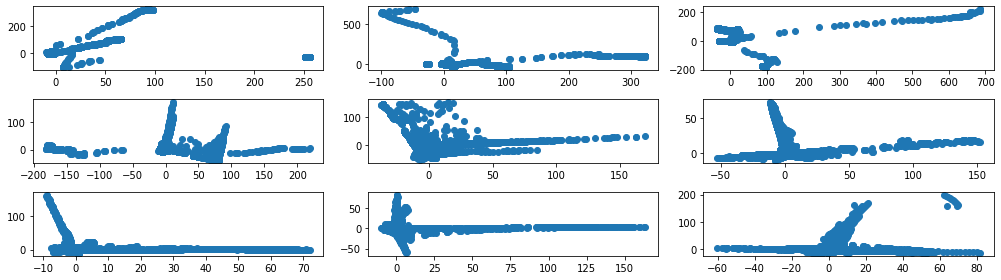

In [56]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.scatter(train_x_pac[:, i - 1], train_x_pac[:, i])

plt.rcParams["figure.figsize"] = (14,4)
plt.tight_layout()
plt.show()

- 10 ~ 20

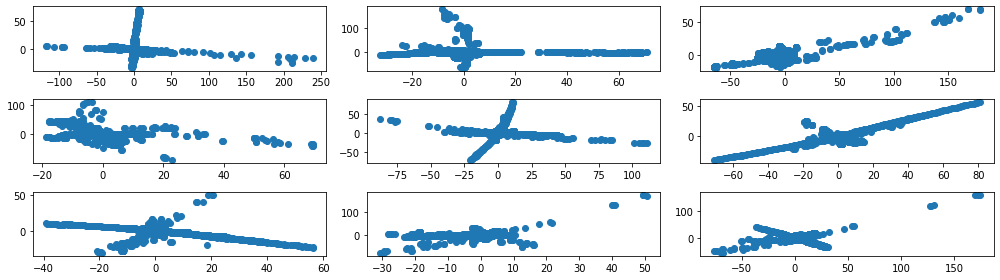

In [58]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.scatter(train_x_pac[:, i + 10 - 1], train_x_pac[:, i + 10])

plt.rcParams["figure.figsize"] = (14,4)
plt.tight_layout()
plt.show()

- 20 ~ 30

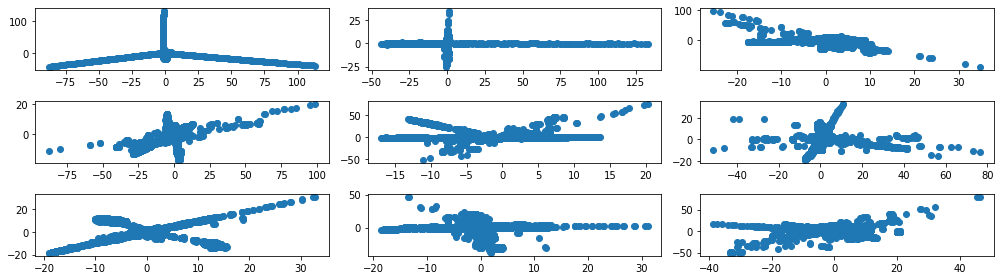

In [59]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.scatter(train_x_pac[:, i + 20 - 1], train_x_pac[:, i + 20])

plt.rcParams["figure.figsize"] = (14,4)
plt.tight_layout()
plt.show()